In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np
from paste2 import PASTE2, projection

/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data_list = ["151507","151508","151509","151510"]
adata = []
for data in data_list:
    adata.append(
        sc.read_h5ad(f"/home/wcx99075523/Experiments/STForte/data/DLPFC/{data}_10xvisium.h5ad")
    )

In [3]:
pis = []
for i in range(3):
    pis.append(PASTE2.partial_pairwise_align(adata[i], adata[i+1], s=0.7))

PASTE2 starts...
Starting GLM-PCA...
Iteration: 0 | deviance=1.6010E+7
Iteration: 1 | deviance=1.6010E+7
Iteration: 2 | deviance=1.5205E+7
Iteration: 3 | deviance=1.4780E+7
Iteration: 4 | deviance=1.4591E+7
Iteration: 5 | deviance=1.4504E+7
Iteration: 6 | deviance=1.4457E+7
Iteration: 7 | deviance=1.4428E+7
Iteration: 8 | deviance=1.4407E+7
Iteration: 9 | deviance=1.4390E+7
Iteration: 10 | deviance=1.4376E+7
Iteration: 11 | deviance=1.4365E+7
Iteration: 12 | deviance=1.4355E+7
Iteration: 13 | deviance=1.4347E+7
Iteration: 14 | deviance=1.4339E+7
Iteration: 15 | deviance=1.4333E+7
Iteration: 16 | deviance=1.4327E+7
Iteration: 17 | deviance=1.4322E+7
Iteration: 18 | deviance=1.4317E+7
Iteration: 19 | deviance=1.4313E+7
Iteration: 20 | deviance=1.4309E+7
Iteration: 21 | deviance=1.4305E+7
Iteration: 22 | deviance=1.4302E+7
Iteration: 23 | deviance=1.4299E+7
Iteration: 24 | deviance=1.4296E+7
Iteration: 25 | deviance=1.4294E+7
Iteration: 26 | deviance=1.4291E+7
Iteration: 27 | deviance=1.4

In [4]:
new_slices = projection.partial_stack_slices_pairwise(adata, pis)

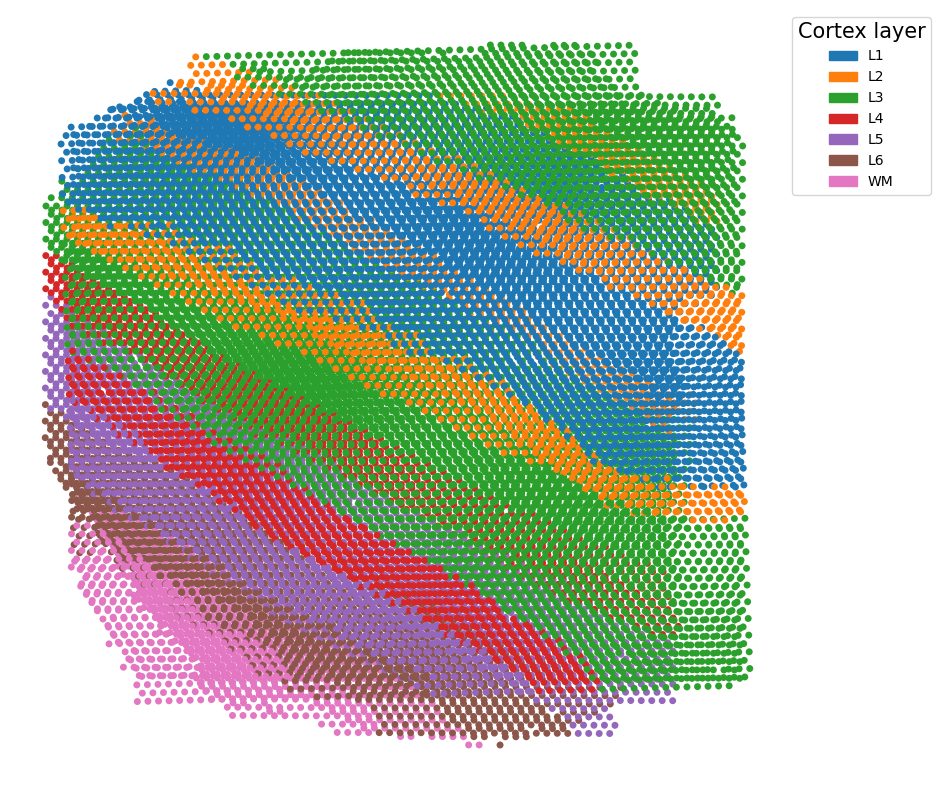

In [7]:
layer_to_color_map = {'L{0}'.format(i+1):sns.color_palette()[i] for i in range(6)}
layer_to_color_map['WM'] = sns.color_palette()[6]
def plot_slices_overlap(slices, layer_to_color_map=layer_to_color_map):
    plt.figure(figsize=(10,10))
    for i in range(len(slices)):
        adata = slices[i]
        adata = adata[~adata.obs['spatialLIBD'].isna()]
        colors = list(adata.obs['spatialLIBD'].astype('str').map(layer_to_color_map))
        plt.scatter(adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1],linewidth=0,s=100, marker=".",color=colors)
    plt.legend(handles=[mpatches.Patch(color=layer_to_color_map[adata.obs['spatialLIBD'].cat.categories[i]], label=adata.obs['spatialLIBD'].cat.categories[i]) for i in range(len(adata.obs['spatialLIBD'].cat.categories))],fontsize=10,title='Cortex layer',title_fontsize=15,bbox_to_anchor=(1, 1))
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()
    
plot_slices_overlap(new_slices)

In [8]:
new_slices

[AnnData object with n_obs × n_vars = 4226 × 33538
     obs: 'in_tissue', 'array_row', 'array_col', 'spatialLIBD'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial', 'spatialLIBD_colors'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 4384 × 33538
     obs: 'in_tissue', 'array_row', 'array_col', 'spatialLIBD'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial', 'spatialLIBD_colors'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 4789 × 33538
     obs: 'in_tissue', 'array_row', 'array_col', 'spatialLIBD'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial', 'spatialLIBD_colors'
     obsm: 'spatial',
 AnnData object with n_obs × n_vars = 4634 × 33538
     obs: 'in_tissue', 'array_row', 'array_col', 'spatialLIBD'
     var: 'gene_ids', 'feature_types', 'genome'
     uns: 'spatial', 'spatialLIBD_colors'
     obsm: 'spatial']

In [9]:
adata_cat = sc.concat(new_slices,axis=0)
adata_cat

/home/wcx99075523/miniconda3/envs/stforte/lib/python3.9/site-packages/anndata/_core/anndata.py:1897: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 18033 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'spatialLIBD'
    obsm: 'spatial'

In [10]:
for i in range(4):
    adata_cat.uns[data_list[i]] = new_slices[i].uns
adata_cat.obs['section_id'] = np.array([0]*4226+[1]*4384+[2]*4789+[3]*4634)
adata_cat

AnnData object with n_obs × n_vars = 18033 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'spatialLIBD', 'section_id'
    uns: '151507', '151508', '151509', '151510'
    obsm: 'spatial'

In [11]:
adata_cat.write("/home/wcx99075523/Experiments/stforte/trial-DLPFC-pca/multi_slides/data/adata_507_510_paste2.h5ad")